In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import matplotlib.pyplot as plot
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [2]:
data = pandas.read_csv("data/co2_emissions_data.csv")
print(data.columns)

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)', 'Emission Class'],
      dtype='object')


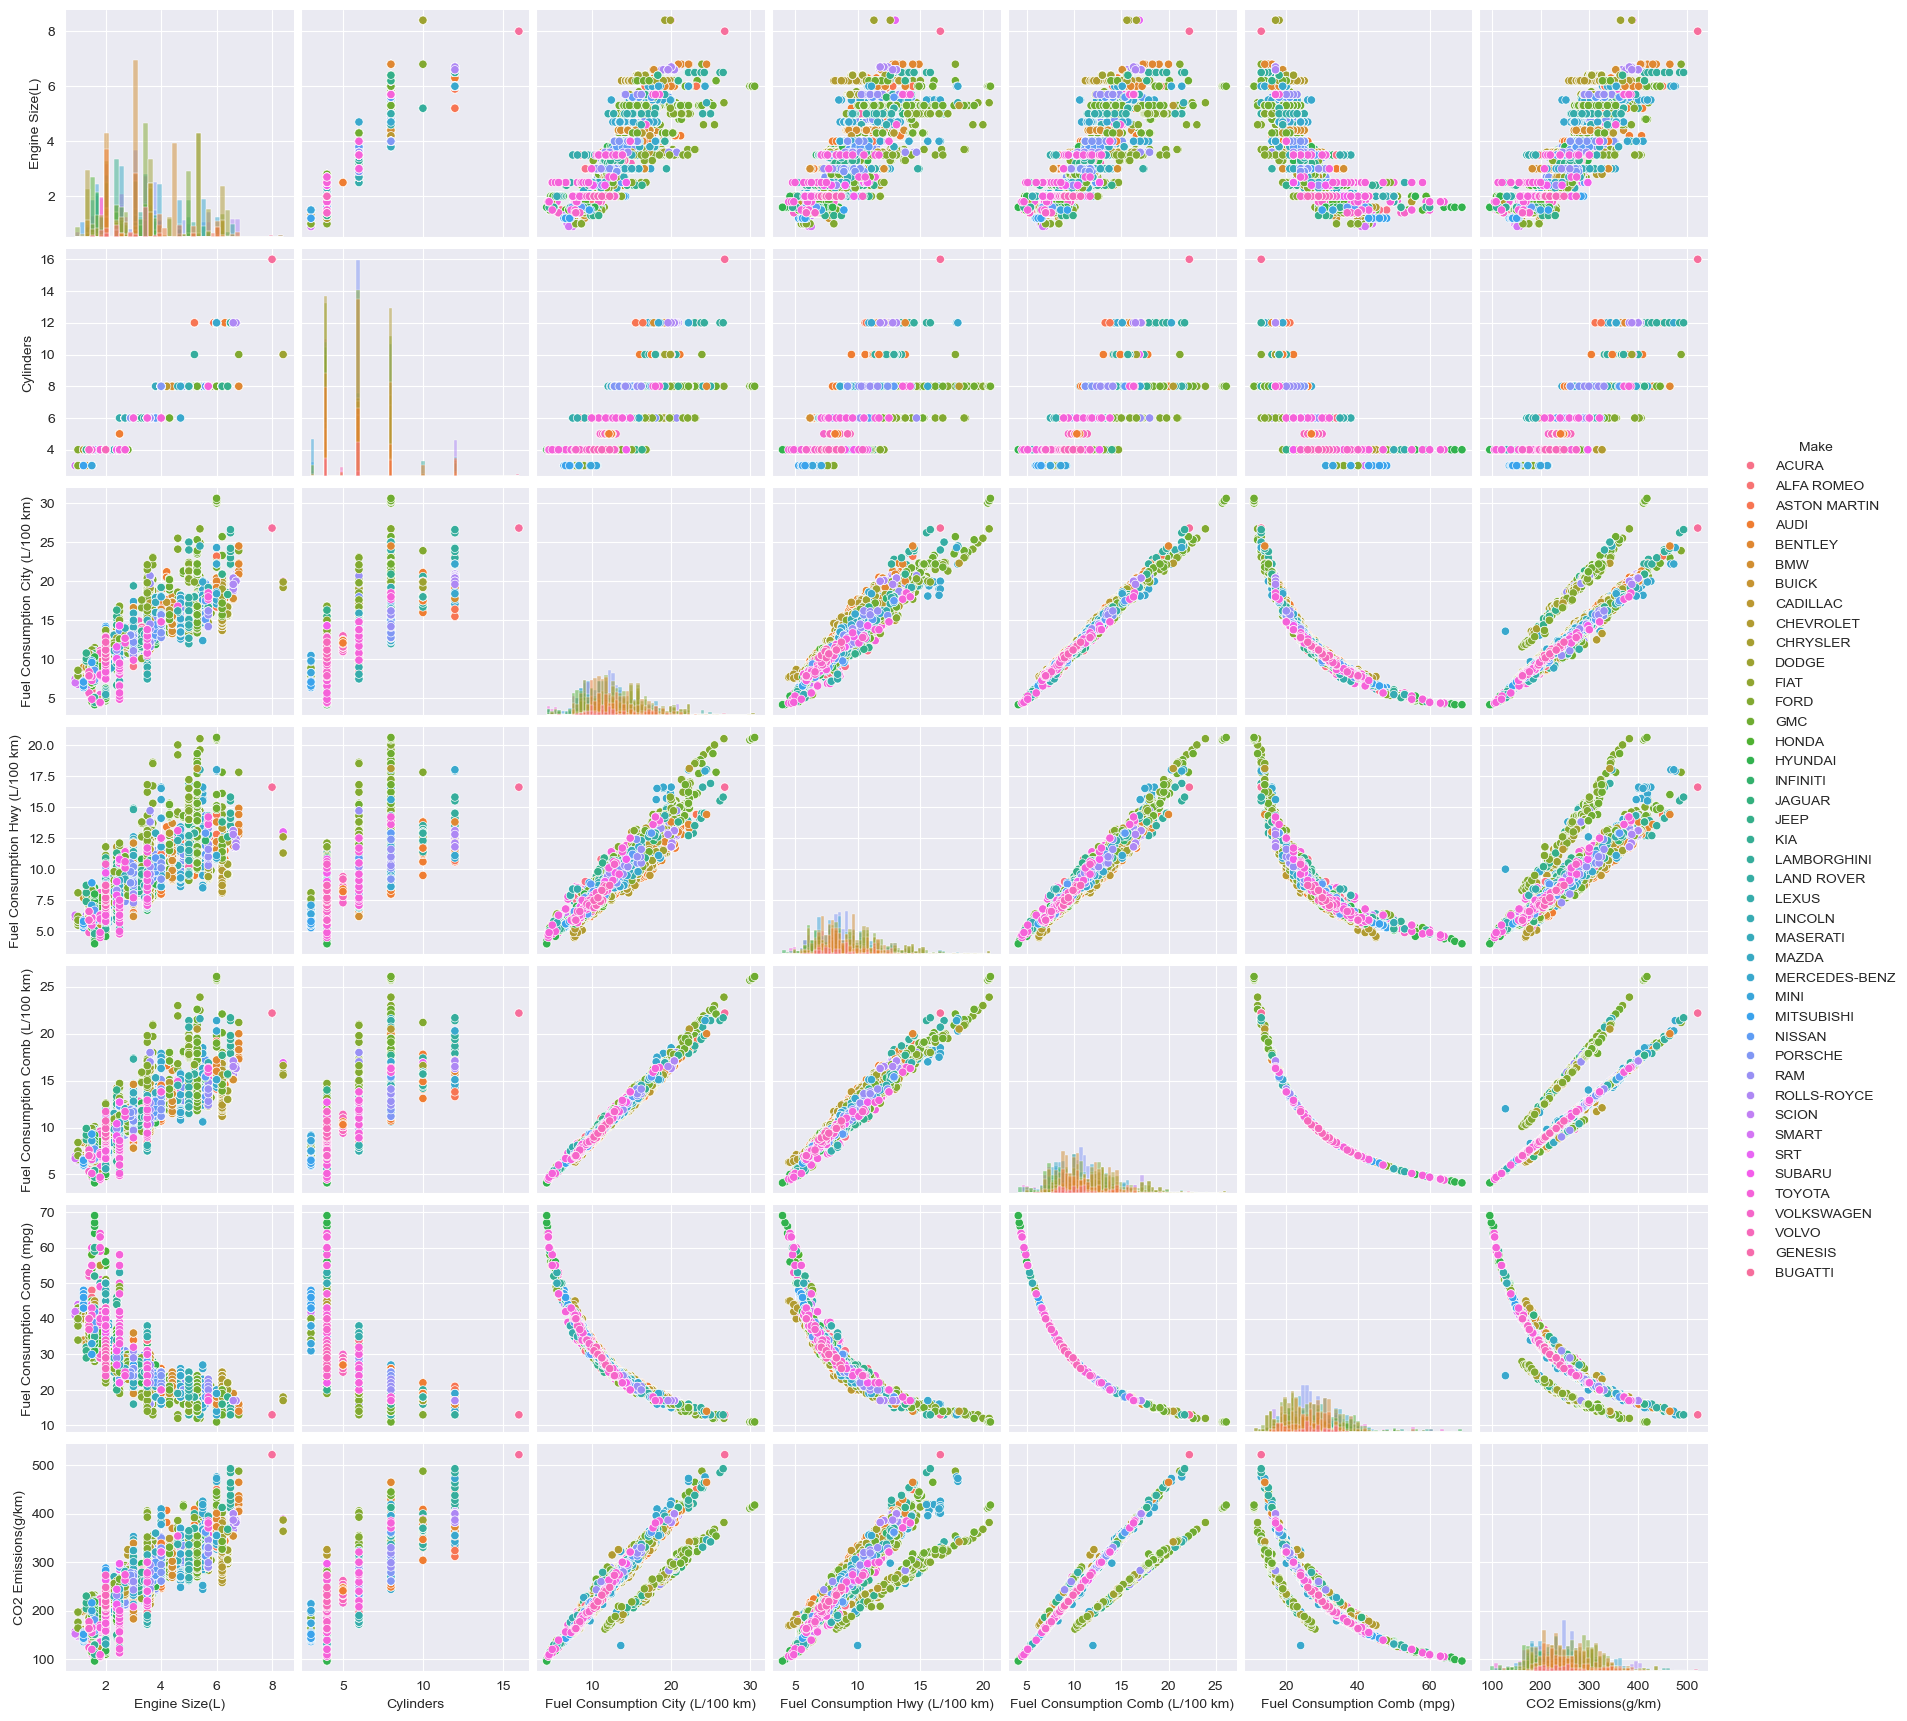

In [3]:
# visualize pairplot
sns.pairplot(data, hue='Make', diag_kind='hist')
plot.show()
# make, model, fuel type, transmission, cylinders not affecting
# engine size....... maybe!!!!
# , Fuel Consumption Comb (mpg), Fuel Consumption Comb (L/100 km), Fuel Consumption Hwy (L/100 km)
# Fuel Consumption City (L/100 km), Fuel Consumption Comb (mpg)

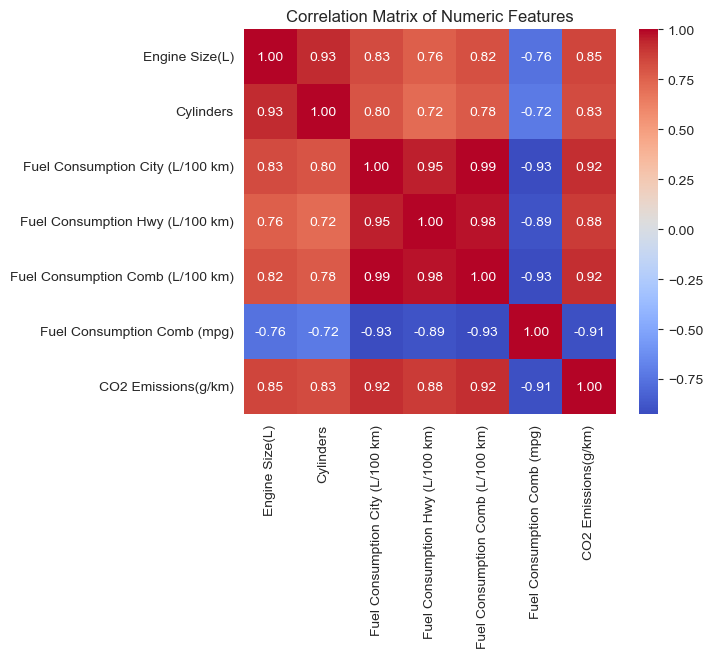

In [4]:
# visualize heatmap
numeric_data = data.select_dtypes(include=['number'])

plot.figure(figsize=(6, 5))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plot.title('Correlation Matrix of Numeric Features')
plot.show()



In [5]:
# check the missing values
print("     Missing data in each feature:")
print(data.isnull().sum())

     Missing data in each feature:
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
Emission Class                      0
dtype: int64


In [6]:
# check if the numeric values are scaled
print(numeric_data.describe())

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000         

In [7]:
X = data.drop(['CO2 Emissions(g/km)', 'Emission Class'], axis=1)
Y = pandas.concat([data['CO2 Emissions(g/km)'], data['Emission Class']], axis=1)
y_emission_class = data['Emission Class']

features = ["Engine Size(L)", "Fuel Consumption Comb (L/100 km)"]

X = X[features]
# You can further preprocess X if needed (e.g., handle categorical features, scale numerical features)
# Example: One-hot encode categorical features
# X = pandas.get_dummies(X, columns=['Make', 'Model', 'Fuel Type', 'Transmission']) # Example, adapt to your actual categorical columns

# Example: Scale numerical features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# numerical_cols = X.select_dtypes(include=['number']).columns
# X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("Features (X) shape:", X.shape)
print("Labels (Y) shape:", Y.shape)

Features (X) shape: (7385, 2)
Labels (Y) shape: (7385, 2)


In [8]:
X.columns

Index(['Engine Size(L)', 'Fuel Consumption Comb (L/100 km)'], dtype='object')

In [9]:
# Shuffle the data
X, y_emission_class = shuffle(X, y_emission_class, random_state=42)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y_emission_class, test_size=0.2, random_state=42)



In [10]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (5908, 2)
X_test shape: (1477, 2)
Y_train shape: (5908,)
Y_test shape: (1477,)


In [11]:
# encode the categorical data
categorical_cols = X.select_dtypes(include=['object']).columns
X = pandas.get_dummies(X, columns=categorical_cols)
categorical_cols = Y.select_dtypes(include=['object']).columns
y_emission_class = pandas.get_dummies(Y, columns=categorical_cols)

In [12]:
# prompt: Scale the training set. then scale test set using the same statistics

# Scale numerical features in the training set
scaler = StandardScaler()
numerical_cols = X_train.select_dtypes(include=['number']).columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Scale numerical features in the test set using the same scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [13]:
print(X_test.describe())
print(X_train.describe())
print(Y_test.describe())
print(Y_train.describe())

       Engine Size(L)  Fuel Consumption Comb (L/100 km)
count     1477.000000                       1477.000000
mean         0.030068                          0.012222
std          1.013199                          1.018008
min         -1.593455                         -2.383057
25%         -0.852983                         -0.717561
50%         -0.112512                         -0.127697
75%          0.479865                          0.600958
max          3.886033                          5.250469
       Engine Size(L)  Fuel Consumption Comb (L/100 km)
count    5.908000e+03                      5.908000e+03
mean    -1.250786e-16                     -3.475742e-16
std      1.000085e+00                      1.000085e+00
min     -1.667502e+00                     -2.383057e+00
25%     -8.529833e-01                     -7.175606e-01
50%     -1.125120e-01                     -1.623951e-01
75%      4.058179e-01                      5.662597e-01
max      3.886033e+00                      5.250

In [14]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (5908, 2)
X_test shape: (1477, 2)
Y_train shape: (5908,)
Y_test shape: (1477,)


In [15]:
# Here we create the stochastic gradient classifier model and fitting the model
regressor = SGDClassifier()
regressor.fit(X_train, Y_train)

# Testing the model using the test set and get accuracy
y_pred = regressor.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.964116452268111


Correlation Matrix:
                                 Engine Size(L)  \
Engine Size(L)                         1.000000   
Fuel Consumption Hwy (L/100 km)        0.761526   
CO2 Emissions(g/km)                    0.851145   

                                 Fuel Consumption Hwy (L/100 km)  \
Engine Size(L)                                          0.761526   
Fuel Consumption Hwy (L/100 km)                         1.000000   
CO2 Emissions(g/km)                                     0.883536   

                                 CO2 Emissions(g/km)  
Engine Size(L)                              0.851145  
Fuel Consumption Hwy (L/100 km)             0.883536  
CO2 Emissions(g/km)                         1.000000  


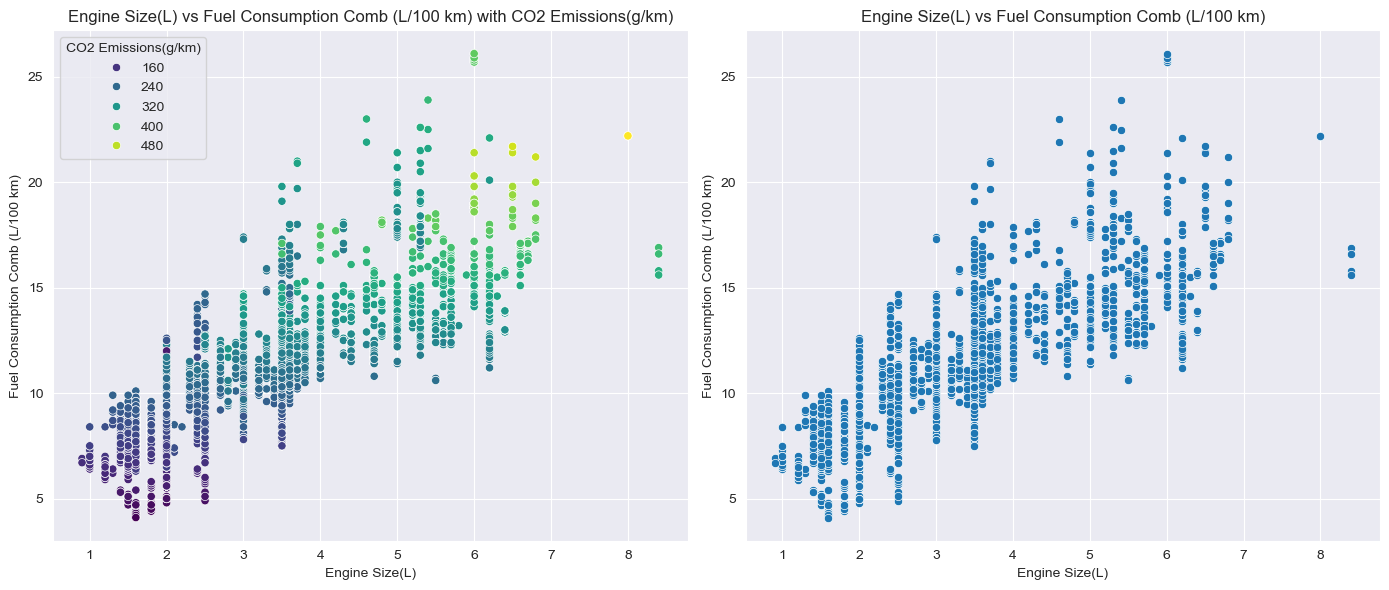

In [16]:
# show the relationship between 'Engine Size(L)', 'Fuel Consumption Hwy (L/100 km)' and 'CO2 Emissions(g/km)'
# show the relationship between 'Engine Size(L)', 'Fuel Consumption Hwy (L/100 km)'
# show two graphs one for the relationship between 'Engine Size(L)', 'Fuel Consumption Hwy (L/100 km)' and 'CO2 Emissions(g/km)' and the other for the relationship between 'Engine Size(L)', 'Fuel Consumption Hwy (L/100 km)'
# Display correlation in numeric format
correlation_matrix = data[['Engine Size(L)', 'Fuel Consumption Hwy (L/100 km)', 'CO2 Emissions(g/km)']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the relationship between 'Engine Size(L)', 'Fuel Consumption Hwy (L/100 km)', and 'CO2 Emissions(g/km)'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='Engine Size(L)', y='Fuel Consumption Comb (L/100 km)', hue='CO2 Emissions(g/km)', palette='viridis')
plt.title('Engine Size(L) vs Fuel Consumption Comb (L/100 km) with CO2 Emissions(g/km)')
plt.xlabel('Engine Size(L)')
plt.ylabel('Fuel Consumption Comb (L/100 km)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='Engine Size(L)', y='Fuel Consumption Comb (L/100 km)')
plt.title('Engine Size(L) vs Fuel Consumption Comb (L/100 km)')
plt.xlabel('Engine Size(L)')
plt.ylabel('Fuel Consumption Comb (L/100 km)')

plt.tight_layout()
plt.show()

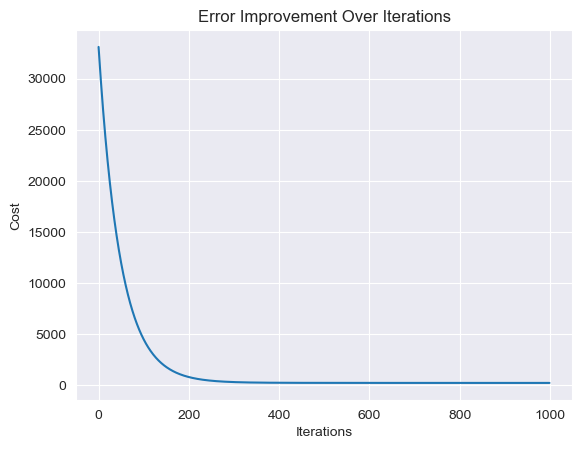

R2 Score: 0.8732174093325296


In [17]:
X = data[['Engine Size(L)', 'Fuel Consumption Comb (L/100 km)']].values
y = data['CO2 Emissions(g/km)'].values

# Normalize features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add a column of ones to X for the bias term
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Initialize parameters
theta = np.zeros(X.shape[1])
alpha = 0.01
iterations = 1000
m = len(y)
cost_history = []

# Gradient descent
for i in range(iterations):
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1/(2*m)) * np.dot(errors.T, errors)
    cost_history.append(cost)
    theta -= (alpha/m) * X.T.dot(errors)

# Plot the cost history
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Error Improvement Over Iterations")
plt.show()

# Evaluate the model using R2 score
y_pred = X.dot(theta)
print("R2 Score:", r2_score(y, y_pred))